In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "./"  #Insert path here as needed
database = path + 'database.sqlite'

conn = sqlite3.connect(database)

In [1]:
## View the tables that we have available

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
print(tables)

    type               name           tbl_name  rootpage  \
0  table    sqlite_sequence    sqlite_sequence         4   
1  table  Player_Attributes  Player_Attributes        11   
2  table             Player             Player        14   
3  table              Match              Match        18   
4  table             League             League        24   
5  table            Country            Country        26   
6  table               Team               Team        29   
7  table    Team_Attributes    Team_Attributes         2   

                                                 sql  
0             CREATE TABLE sqlite_sequence(name,seq)  
1  CREATE TABLE "Player_Attributes" (\n\t`id`\tIN...  
2  CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...  
3  CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...  
4  CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...  
5  CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...  
6  CREATE TABLE "Team" (\n\t`id`\tINTEGER PRIMARY...  
7  CREATE TABLE `Te

In [2]:
## Focus in on one table, view the countries playing

countries = pd.read_sql("""SELECT *
                        FROM Country;""", conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [3]:
## See how many total countries are competing
count_countries = pd.read_sql("""SELECT COUNT(*)
                        FROM Country;""", conn)
count_countries

,COUNT(*)
0,11


### Joining in SQL

In order to establish meaningful relationships across multiple tables, we'll need to use JOIN commands. JOIN allows us to create a new table from multiple tables by joining them on a key. 

The most commonly used join is the INNER JOIN , which keeps only records that occur in both tables.
If we need to keep records that occur in only one table, the most commonly used JOIN is LEFT JOIN. This is like INNER JOIN but it keeps all the rows from the left table regardless of if they exist in the output table. 



In [8]:
leagues = pd.read_sql("""SELECT c.name as country, 
                        l.name as league
                        FROM League as l 
                        JOIN Country as c
                        ON c.id = l.country_id;""", conn)
leagues

,country,league
0,Belgium,Belgium Jupiler League
1,England,England Premier League
2,France,France Ligue 1
3,Germany,Germany 1. Bundesliga
4,Italy,Italy Serie A
5,Netherlands,Netherlands Eredivisie
6,Poland,Poland Ekstraklasa
7,Portugal,Portugal Liga ZON Sagres
8,Scotland,Scotland Premier League
9,Spain,Spain LIGA BBVA


In [10]:
pd.read_sql("""
            SELECT * from Team LIMIT 5;
            """, conn)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673,KRC Genk,GEN
1,2,9993,675,Beerschot AC,BAC
2,3,10000,15005,SV Zulte-Waregem,ZUL
3,4,9994,2007,Sporting Lokeren,LOK
4,5,9984,1750,KSV Cercle Brugge,CEB


In [23]:
portugal_matches = pd.read_sql("""
            SELECT m.id as match_id, 
                c.name AS country_name, 
                l.name AS league_name, 
                season, 
                stage, 
                date, 
                ht.team_long_name as home_team,
                at.team_long_name as away_team,
                home_team_goal,
                away_team_goal
            FROM Match AS m
            JOIN Country AS c on c.id = m.country_id
            JOIN League AS l on l.id = m.league_id
            LEFT JOIN Team AS ht
                ON m.home_team_api_id = ht.team_api_id
            LEFT JOIN Team AS at
                ON m.away_team_api_id = at.team_api_id
            WHERE country_name = 'Portugal'
            ORDER by date
            LIMIT 10;
            """, conn)
portugal_matches

,match_id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,17644,Portugal,Portugal Liga ZON Sagres,2008/2009,1,2008-08-22 00:00:00,Vitória Guimarães,Vitória Setúbal,1,1
1,17643,Portugal,Portugal Liga ZON Sagres,2008/2009,1,2008-08-23 00:00:00,Sporting CP,Trofense,3,1
2,17645,Portugal,Portugal Liga ZON Sagres,2008/2009,1,2008-08-23 00:00:00,FC Paços de Ferreira,SC Braga,0,2
3,17642,Portugal,Portugal Liga ZON Sagres,2008/2009,1,2008-08-24 00:00:00,FC Porto,CF Os Belenenses,2,0
4,17646,Portugal,Portugal Liga ZON Sagres,2008/2009,1,2008-08-24 00:00:00,Amadora,Académica de Coimbra,1,0
5,17647,Portugal,Portugal Liga ZON Sagres,2008/2009,1,2008-08-24 00:00:00,Rio Ave FC,SL Benfica,1,1
6,17648,Portugal,Portugal Liga ZON Sagres,2008/2009,1,2008-08-24 00:00:00,Leixões SC,CD Nacional,1,3
7,17649,Portugal,Portugal Liga ZON Sagres,2008/2009,1,2008-08-24 00:00:00,Naval 1° de Maio,CS Marítimo,1,0
8,17732,Portugal,Portugal Liga ZON Sagres,2008/2009,2,2008-08-29 00:00:00,CF Os Belenenses,FC Paços de Ferreira,2,2
9,17730,Portugal,Portugal Liga ZON Sagres,2008/2009,2,2008-08-30 00:00:00,SL Benfica,FC Porto,1,1


In [29]:
### Find the number of unique seasons for Portugal

pd.read_sql(""" SELECT COUNT(DISTINCT season)
            FROM Match as m
            JOIN Country AS c on c.id = m.country_id
            WHERE c.name = 'Portugal';
""", conn)

,COUNT(DISTINCT season)
0,8


In [30]:
leages_by_season = pd.read_sql("""
        SELECT c.name AS country_name, 
                l.name AS league_name, 
                season,
                COUNT(DISTINCT stage) AS num_stages,
                COUNT(DISTINCT ht.team_long_name) AS num_teams,
                AVG(home_team_goal) AS avg_home_team_goals, 
                AVG(away_team_goal) AS avg_away_team_goals, 
                AVG(home_team_goal - away_team_goal) AS avg_goal_diff, 
                AVG(home_team_goal + away_team_goal) AS avg_goals, 
                SUM(home_team_goal + away_team_goal) AS total_goals                                       
        FROM Match as m
        JOIN Country as c on c.id = m.country_id
        JOIN League as l on l.id = m.league_id
        LEFT JOIN Team AS ht on ht.team_api_id = m.home_team_api_id
        LEFT JOIN Team AS at on at.team_api_id = m.away_team_api_id
        WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
        GROUP BY c.name, l.name, season
        HAVING count(distinct stage) > 10
        ORDER BY c.name, l.name, season DESC
        ;""", conn)
leages_by_season

,country_name,league_name,season,num_stages,num_teams,avg_home_team_goals,avg_away_team_goals,avg_goal_diff,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


In [51]:
relevant_countries = leages_by_season['country_name'].unique().tolist()

### Create a dataframe with leagues in the rows and
### countries in the columns
df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), 
             columns=relevant_countries)

### Place the average goals as the values
for c in relevant_countries:
    vals = list(leages_by_season.loc[leages_by_season['country_name']==c,'avg_goals'])
    df.loc[:, c] = vals[::-1]

/home/hanna/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


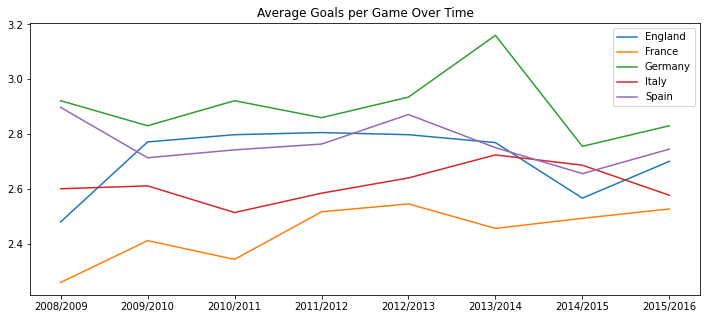

In [55]:
df.plot(figsize=(12,5),title='Average Goals per Game Over Time')
plt.show()

/home/hanna/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


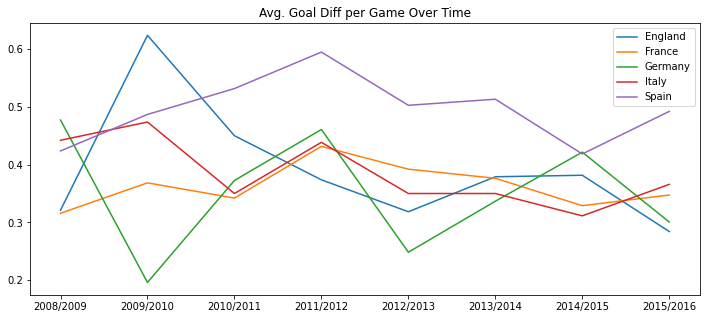

In [56]:
### Create a dataframe with leagues in the rows and
### countries in the columns
df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), 
             columns=relevant_countries)

### Place the average goals as the values
for c in relevant_countries:
    vals = list(leages_by_season.loc[leages_by_season['country_name']==c,'avg_goal_diff'])
    df.loc[:, c] = vals[::-1]
    
df.plot(figsize=(12,5),title='Avg. Goal Diff per Game Over Time')
plt.show()